# Comparação estações INMET
Processamento de dados e comparação estatística entre estações

In [1]:
from normaslt import geral
import pandas as pd
import seaborn as sns

In [2]:
estacoes = ['Bauru', 'Rio de Janeiro', 'Teresópolis', 'Juti', 'Bento Gonçalves', 'Belém', 'Cuiabá', 'Manaus', 'Brasília', 'São Paulo', 'Recife']
temp = pd.DataFrame()
tMax = pd.DataFrame()
tMin = pd.DataFrame()
prec = pd.DataFrame()
lat = []
long = []
for i, estacao in enumerate(estacoes):
  dados, la, lo = geral.readEstacao(estacao, 2013, 2023)
  lat.append(la)
  long.append(lo)
  temp[estacao] = dados['tMed']
  tMax[estacao] = dados['tMax']
  tMin[estacao] = dados['tMin']
  prec[estacao] = dados['precTotal']

prec = prec.replace(0, None)

In [3]:
temp

,Bauru,Rio de Janeiro,Teresópolis,Juti,Bento Gonçalves,Belém,Cuiabá,Manaus,Brasília,São Paulo,Recife
0,24.5,27.2,22.0,25.5,24.7,24.0,26.1,24.3,24.1,24.8,26.5
1,24.0,27.9,22.2,25.5,24.6,23.5,24.7,23.9,23.5,24.2,26.4
2,23.2,27.9,21.3,25.8,24.7,23.4,24.5,24.0,23.3,23.4,26.3
3,22.8,27.3,20.8,25.6,24.8,23.6,24.4,24.1,22.8,22.1,25.1
4,22.4,27.0,21.5,25.1,24.6,23.3,24.4,24.0,22.4,22.5,25.4
...,...,...,...,...,...,...,...,...,...,...,...
96403,32.3,24.4,18.0,29.8,21.7,33.2,34.4,27.5,26.1,23.8,NaN
96404,31.9,23.8,17.9,29.4,22.0,28.1,33.4,29.4,27.7,21.2,NaN
96405,29.5,23.3,17.6,28.9,21.1,27.9,32.5,27.6,25.5,21.2,NaN
96406,27.4,23.1,17.0,27.7,19.5,27.8,30.8,26.7,23.4,20.4,NaN


In [15]:
dados.describe().round(2)

,precTotal,pMed,pMax,pMin,rad,tMed,tOrv,tMax,tMin,tOrvMax,tOrvMin,umidMax,umidMin,umid,dirVento,ventoRaj,ventoHor,Tempo UTC
count,76022.00,76083.00,76057.00,76057.00,96408.00,76083.00,75116.00,76057.00,76057.00,75052.00,75052.00,75059.00,75057.00,75116.00,64449.00,64382.00,64453.00,96408
mean,0.23,1013.01,1013.24,1012.78,-513.92,25.87,21.18,26.45,25.33,21.70,20.69,79.05,73.86,76.51,161.36,4.75,1.51,2018-07-02 11:30:00
min,0.00,1006.00,1006.20,1005.90,-2777.50,18.00,10.90,18.20,17.90,15.10,6.60,40.00,27.00,28.00,1.00,0.00,0.00,2013-01-01 00:00:00
25%,0.00,1011.40,1011.70,1011.20,-2777.50,23.70,20.20,24.20,23.40,20.70,19.70,70.00,63.00,66.00,116.00,2.70,0.70,2015-10-02 05:45:00
50%,0.00,1012.90,1013.10,1012.60,0.00,25.80,21.20,26.30,25.20,21.70,20.80,80.00,74.00,77.00,136.00,5.00,1.50,2018-07-02 11:30:00
75%,0.00,1014.50,1014.70,1014.30,368.88,27.90,22.20,28.70,27.20,22.70,21.80,89.00,87.00,88.00,203.00,6.60,2.20,2021-04-01 17:15:00
max,45.60,1020.50,1020.60,1020.40,1360.78,34.40,29.30,35.20,33.30,30.40,27.40,100.00,100.00,100.00,360.00,21.30,4.60,2023-12-31 23:00:00
std,1.25,2.18,2.17,2.17,1359.97,2.77,1.56,2.96,2.57,1.58,1.60,12.07,14.16,13.17,74.37,2.33,0.91,NaN


In [5]:
tMax.describe().round(2)

,Bauru,Rio de Janeiro,Teresópolis,Juti,Bento Gonçalves,Belém,Cuiabá,Manaus,Brasília,São Paulo,Recife
count,91400.00,95719.00,95076.00,73918.00,92072.00,94612.00,87592.00,94801.00,96289.00,95797.00,76057.00
mean,22.66,24.17,18.72,23.90,18.27,27.51,27.83,28.39,22.29,21.11,26.45
std,5.22,3.27,4.19,5.76,5.72,3.25,4.84,3.07,4.00,4.77,2.96
min,2.30,14.70,5.00,1.00,-2.20,2.00,8.50,20.90,6.00,4.50,18.20
25%,19.10,21.80,15.80,20.40,14.60,24.80,24.50,25.90,19.30,17.70,24.20
50%,22.10,23.80,18.60,23.70,18.50,26.40,27.30,27.90,21.80,20.80,26.30
75%,26.20,26.20,21.30,27.90,22.00,30.40,31.30,30.70,25.20,24.10,28.70
max,41.60,39.70,35.00,41.00,37.90,38.50,43.70,41.40,36.50,38.40,35.20


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96408 entries, 0 to 96407
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   precTotal  76022 non-null  float64       
 1   pMed       76083 non-null  float64       
 2   pMax       76057 non-null  float64       
 3   pMin       76057 non-null  float64       
 4   rad        96408 non-null  float64       
 5   tMed       76083 non-null  float64       
 6   tOrv       75116 non-null  float64       
 7   tMax       76057 non-null  float64       
 8   tMin       76057 non-null  float64       
 9   tOrvMax    75052 non-null  float64       
 10  tOrvMin    75052 non-null  float64       
 11  umidMax    75059 non-null  float64       
 12  umidMin    75057 non-null  float64       
 13  umid       75116 non-null  float64       
 14  dirVento   64449 non-null  float64       
 15  ventoRaj   64382 non-null  float64       
 16  ventoHor   64453 non-null  float64      

<Axes: >

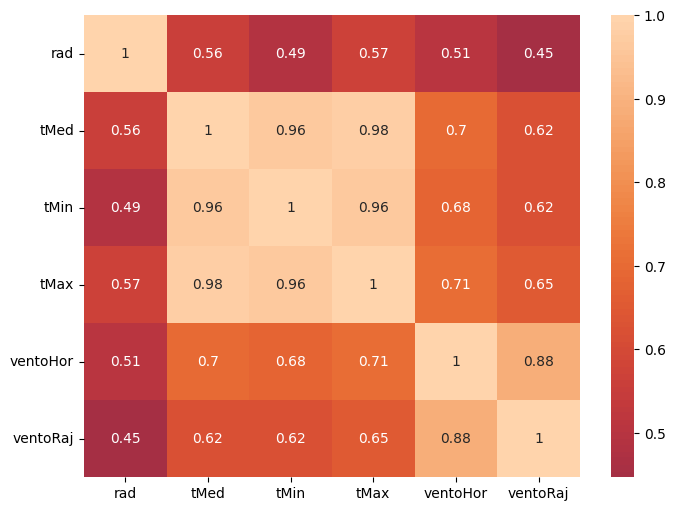

In [7]:
corr = dados[['rad','tMed','tMin','tMax','ventoHor','ventoRaj']].corr()
ax = sns.heatmap(corr, center=0, annot=True)
ax.figure.set_size_inches(8, 6)
ax

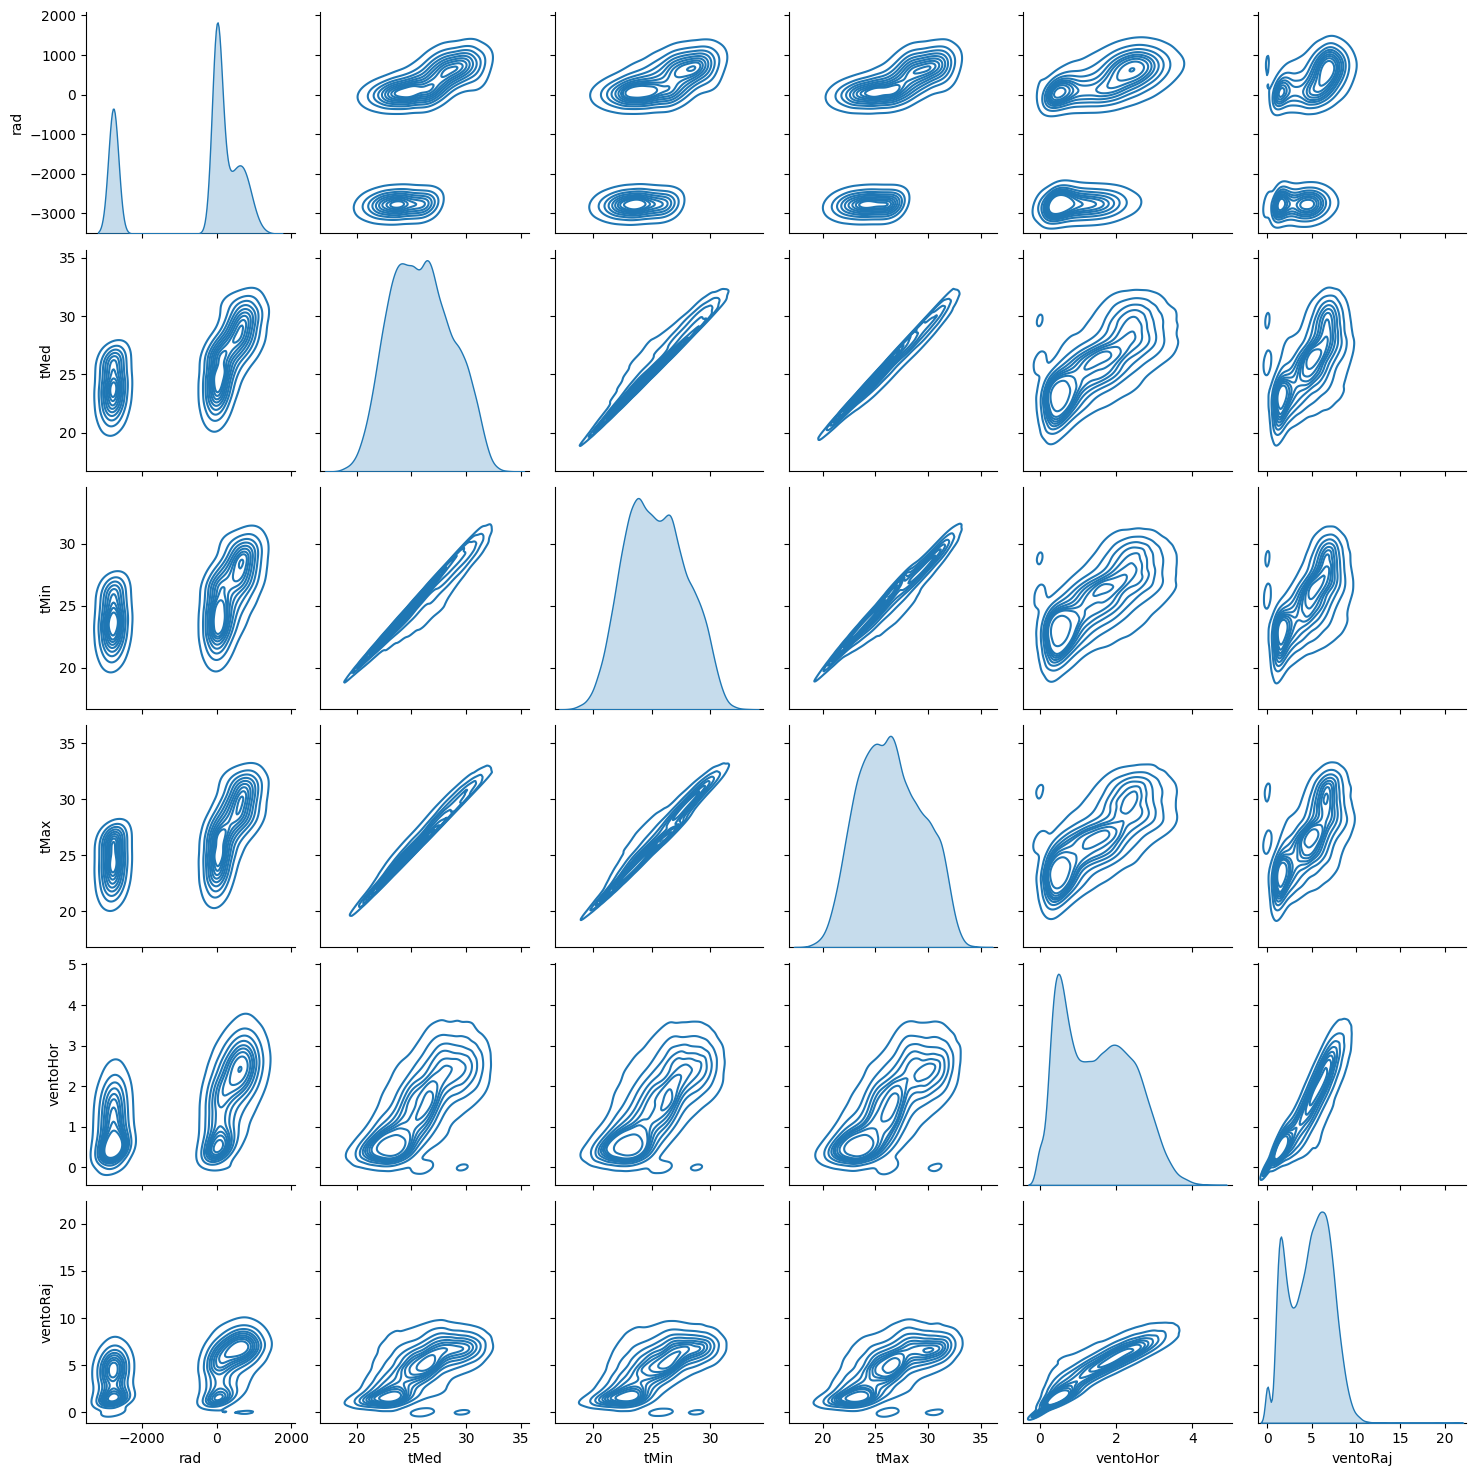

In [14]:
sns.pairplot(dados[['rad','tMed','tMin','tMax','ventoHor','ventoRaj']], kind='kde')

<Axes: title={'center': 'Temperatura média (°C)'}>

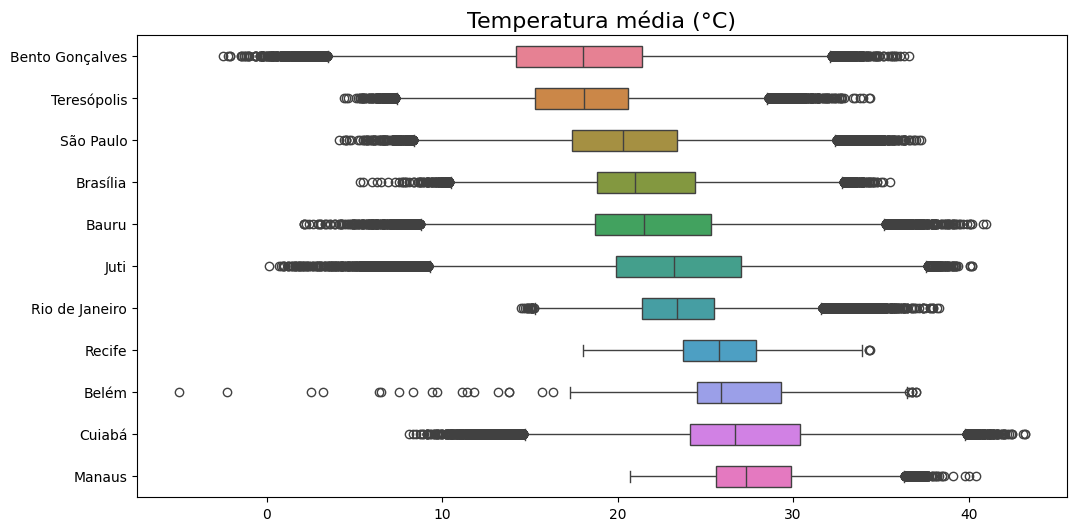

In [8]:
# No boxplot, a plotagem de outliers correspondem a 1.5% da distribuição para cada lado
meds = temp.median()
meds.sort_values(ascending=True, inplace=True)
temp = temp[meds.index]
ax = sns.boxplot(data=temp, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Temperatura média (°C)', fontsize=16)
ax

<Axes: title={'center': 'Temperatura máxima (°C)'}>

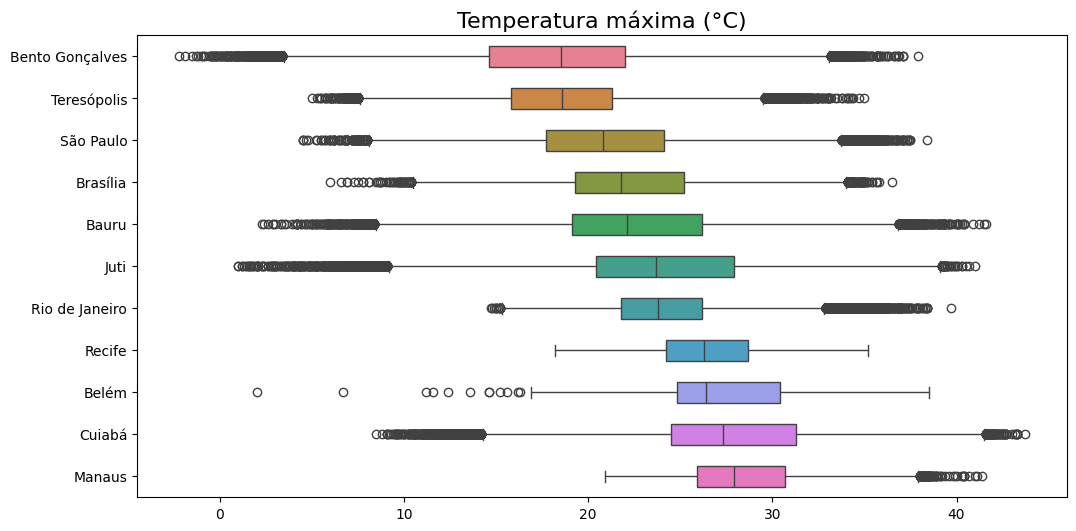

In [9]:
meds = tMax.median()
meds.sort_values(ascending=True, inplace=True)
tMax = tMax[meds.index]
ax = sns.boxplot(data=tMax, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Temperatura máxima (°C)', fontsize=16)
ax

<Axes: title={'center': 'Temperatura máxima (°C)'}, ylabel='Density'>

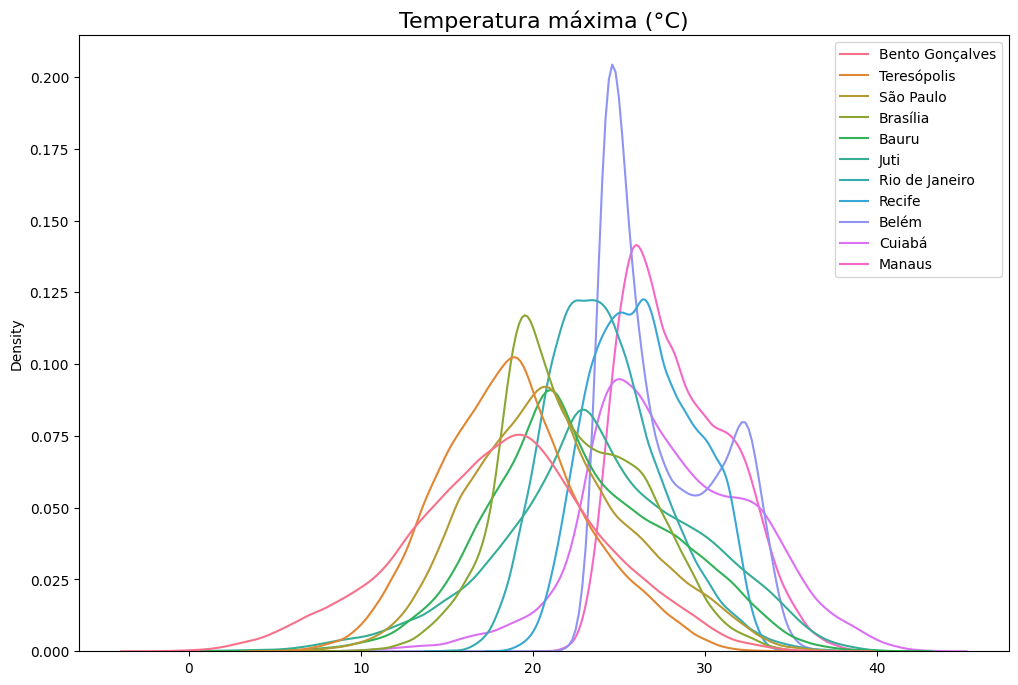

In [10]:
ax = sns.kdeplot(tMax, common_norm=False)
ax.figure.set_size_inches(12, 8)
ax.set_title('Temperatura máxima (°C)', fontsize=16)
ax

<Axes: title={'center': 'Precipitação horária (> 0 mm)'}, ylabel='Density'>

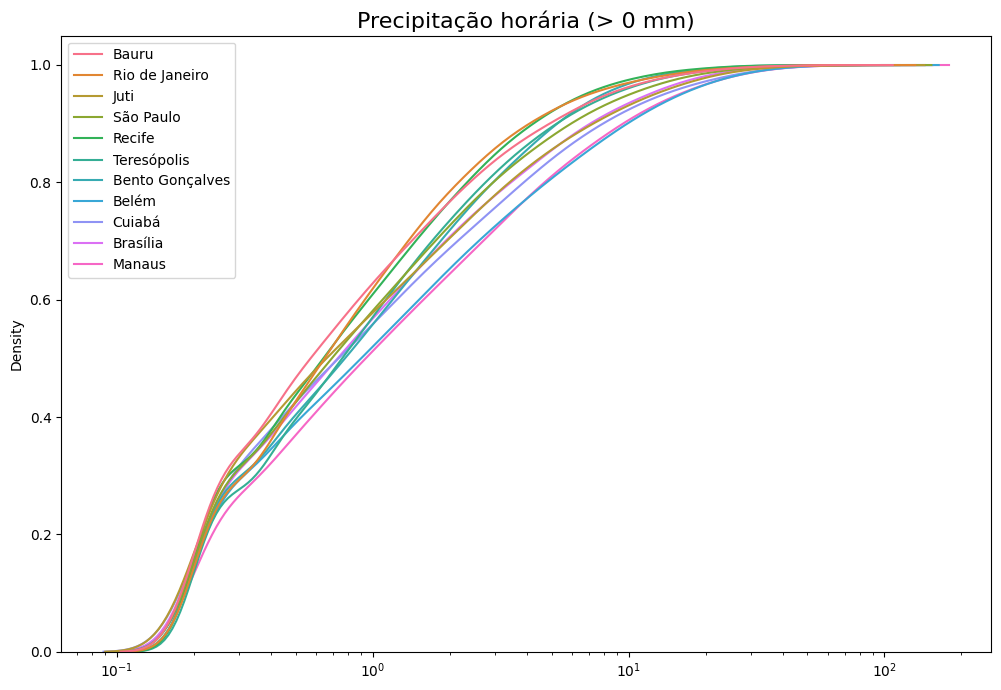

In [11]:
meds = prec.median()
meds.sort_values(ascending=True, inplace=True)
prec = prec[meds.index]
ax = sns.kdeplot(prec, cumulative=True, common_norm=False, log_scale=True)
ax.figure.set_size_inches(12, 8)
ax.set_title('Precipitação horária (> 0 mm)', fontsize=16)
ax